# 데이터 로드

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
# 데이터 읽어오기
df = pd.read_csv('/content/drive/MyDrive/강의 자료/기계학습특론/data/twitter_validation.csv',header=None)

In [6]:
import warnings

warnings.filterwarnings("ignore")

In [7]:
df

,0,1,2,3
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


# EDA & 전처리

## ppt 내 전처리 및 EDA

In [8]:
print(df.columns) # column명 출력
df.head(3)

Index([0, 1, 2, 3], dtype='int64')


,0,1,2,3
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...


In [9]:
# column명 바꾸기
df.rename(columns={2: 'sentiment', 3: 'text'}, inplace=True)

# 0,1 column 없애기
df.drop(columns=[0, 1], inplace=True)

In [10]:
# actual sentiment 값의 분포 확인
df['sentiment'].value_counts()

sentiment
Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: count, dtype: int64

In [11]:
# 실제 sentiment가 "Irrelevant"가 아닌 데이터만 남긴다.
df = df[df['sentiment'] != 'Irrelevant']
df['sentiment'].value_counts()

sentiment
Neutral     285
Positive    277
Negative    266
Name: count, dtype: int64

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

## ppt 외 EDA

### 라벨 분포 확인

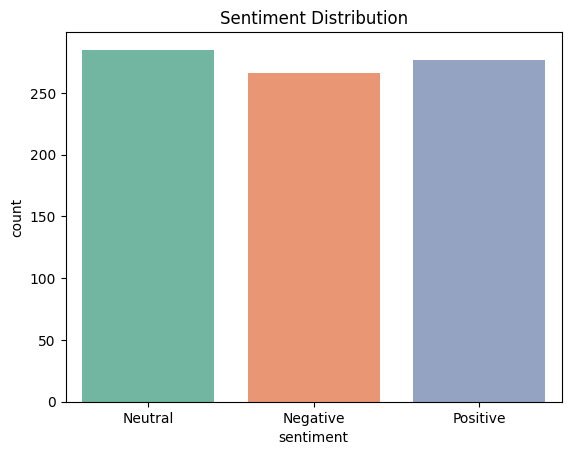

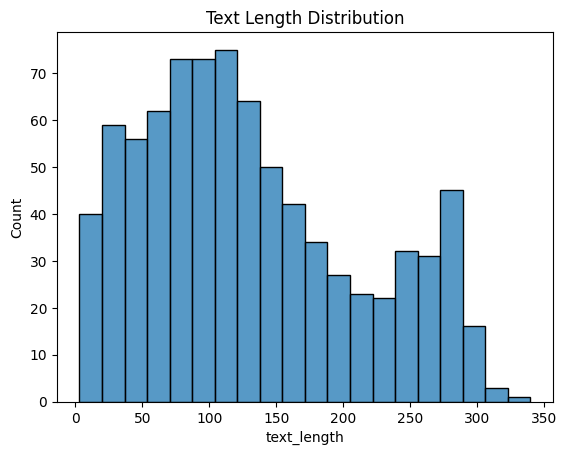

In [13]:
# 감성 분포 확인
sns.countplot(x='sentiment', data=df, palette='Set2')
plt.title('Sentiment Distribution')
plt.show()

# 텍스트 길이 분포 확인
df['text_length'] = df['text'].apply(len)
sns.histplot(df['text_length'], bins=20)
plt.title('Text Length Distribution')
plt.show()

In [289]:
df

,sentiment,text
1,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,Negative,@Microsoft Why do I pay for WORD when it funct...
3,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,Neutral,Now the President is slapping Americans in the...
5,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
993,Negative,Please explain how this is possible! How can t...
994,Positive,Good on Sony. As much as I want to see the new...
997,Positive,Today sucked so it’s time to drink wine n play...
998,Positive,Bought a fraction of Microsoft today. Small wins.


### 라벨 별 중요 단어 확인

In [290]:
from wordcloud import WordCloud

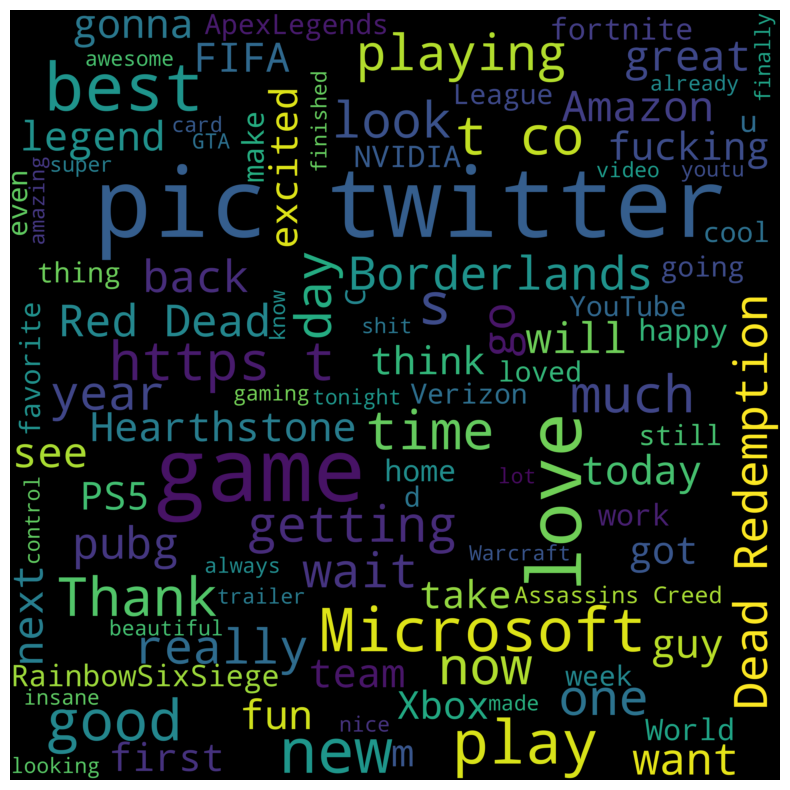

In [291]:
word_cloud_text = ''.join(df[df["sentiment"]=="Positive"].iloc[:, 1])
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

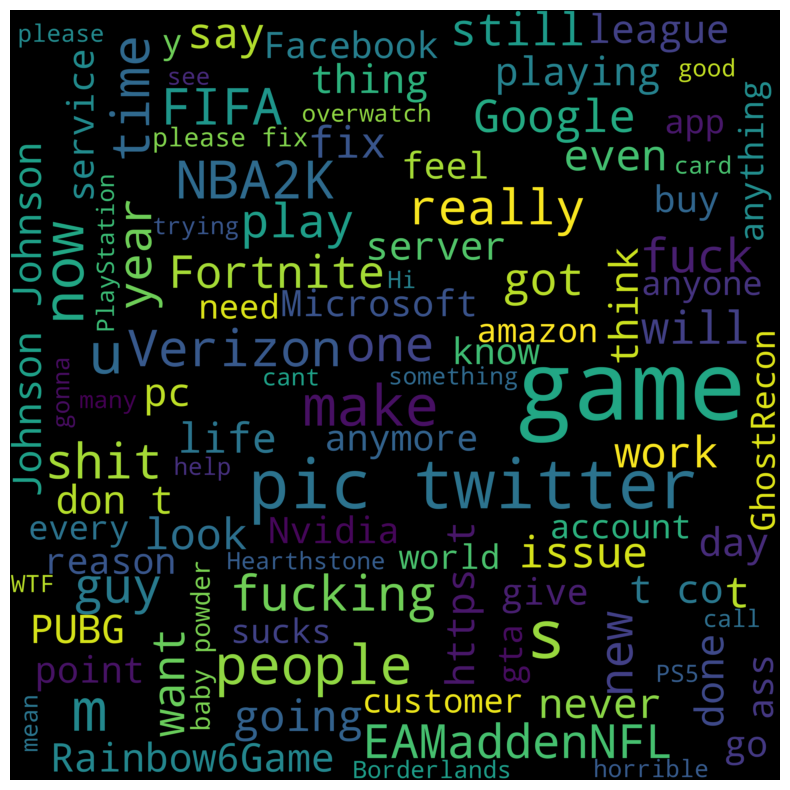

In [292]:
word_cloud_text = ''.join(df[df["sentiment"]=="Negative"].iloc[:, 1])
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

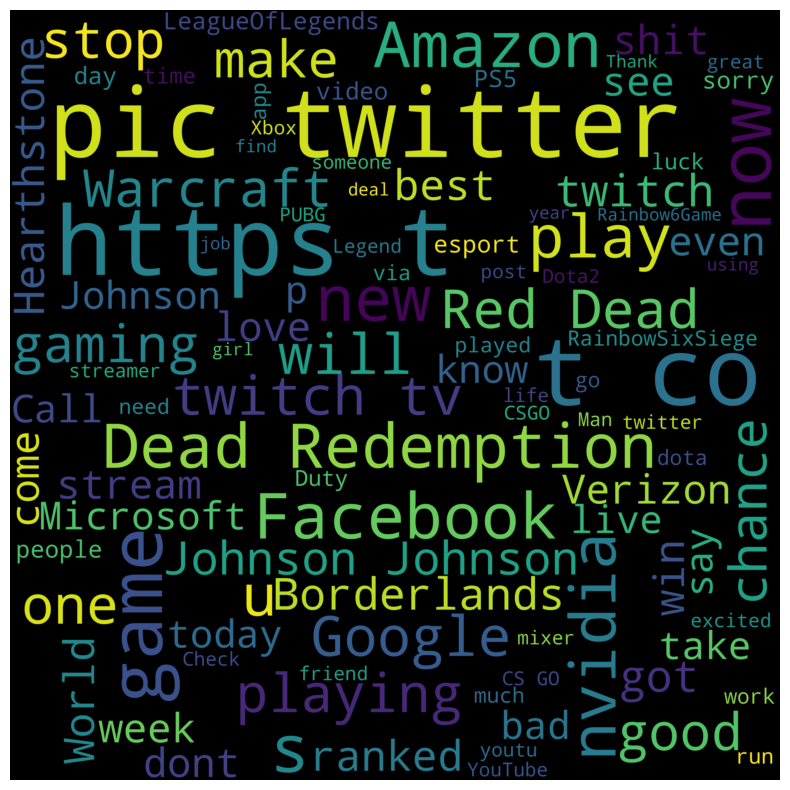

In [293]:
word_cloud_text = ''.join(df[df["sentiment"]=="Neutral"].iloc[:, 1])
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### null 값 & 중복 데이터 확인

In [294]:
def show_details(dataset):
    missed_values = dataset.isnull().sum()
    missed_values_percent = (dataset.isnull().sum()) / len(dataset)
    duplicated_values = dataset.duplicated().sum()
    duplicated_values_percent = (dataset.duplicated().sum()) / len(dataset)
    info_frame = pd.DataFrame({
        'Missed_Values': missed_values,
        'Missed_Values %': missed_values_percent,
        'Duplicated_values': duplicated_values,
        'Duplicated_values %': duplicated_values_percent
    })
    return info_frame.T

In [295]:
show_details(df)

,sentiment,text
Missed_Values,0.000000,0.000000
Missed_Values %,0.000000,0.000000
Duplicated_values,1.000000,1.000000
Duplicated_values %,0.001208,0.001208


## ppt 외 전처리

In [256]:
#!pip install emoji

In [257]:
df['text'].head()

1    BBC News - Amazon boss Jeff Bezos rejects clai...
2    @Microsoft Why do I pay for WORD when it funct...
3    CSGO matchmaking is so full of closet hacking,...
4    Now the President is slapping Americans in the...
5    Hi @EAHelp I’ve had Madeleine McCann in my cel...
Name: text, dtype: object

In [258]:
import nltk
from nltk.corpus import stopwords

# NLTK 불용어 다운로드
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [259]:
# 텍스트 데이터 전처리
import re
import emoji

stop_words = set(stopwords.words('english'))

def remove_special_characters_and_stopwords(text):
    # 이모티콘 정규식을 가져옴
    emoji_list = emoji.emoji_list(text)
    emoji_chars = [e['emoji'] for e in emoji_list]

    # 영어 알파벳, 숫자, 공백, 이모티콘을 제외한 나머지 문자 제거
    cleaned_text = []
    for char in text:
        if char.isalnum() or char.isspace() or char in emoji_chars:
            cleaned_text.append(char)

    cleaned_text = ''.join(cleaned_text)
    # 불용어 처리
    filtered_words = [word for word in cleaned_text.split() if word.lower() not in stop_words]

    return ' '.join(filtered_words)

# 데이터 전처리
df['text'] = df['text'].str.strip()  # 앞뒤 공백 제거
df['text'] = df['text'].str.lower()  # 소문자로 변환
df['text'] = df['text'].apply(remove_special_characters_and_stopwords)


# 중복값 제거
df.drop_duplicates(inplace=True)
# df.dropna(subset=['text'], inplace=True)

In [260]:
df['text'].head()

1    bbc news amazon boss jeff bezos rejects claims...
2    microsoft pay word functions poorly samsungus ...
3    csgo matchmaking full closet hacking truly awf...
4    president slapping americans face really commi...
5    hi eahelp ive madeleine mccann cellar past 13 ...
Name: text, dtype: object

# 모델링 및 결과 확인

In [ ]:
from textblob import TextBlob
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from pattern.en import sentiment

df['TextBlob'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
analyzer = SentimentIntensityAnalyzer()
df['VADER'] = df['text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df['Pattern'] = df['text'].apply(lambda x: sentiment(x)[0])

In [268]:
from textblob import TextBlob

In [269]:
df['TextBlob'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [270]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [271]:
#nltk.download('vader_lexicon')

In [272]:
analyzer = SentimentIntensityAnalyzer()
df['VADER'] = df['text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [273]:
#!pip install pattern

In [274]:
from pattern.en import sentiment

In [275]:
df['Pattern'] = df['text'].apply(lambda x: sentiment(x)[0])

In [276]:
df

,sentiment,text,TextBlob,VADER,Pattern
1,Neutral,bbc news amazon boss jeff bezos rejects claims...,0.000000,-0.0000,0.000000
2,Negative,microsoft pay word functions poorly samsungus ...,-0.400000,-0.1027,-0.400000
3,Negative,csgo matchmaking full closet hacking truly awf...,-0.350000,-0.0258,-0.350000
4,Neutral,president slapping americans face really commi...,0.200000,0.3597,0.200000
5,Negative,hi eahelp ive madeleine mccann cellar past 13 ...,-0.218750,-0.4116,-0.218750
...,...,...,...,...,...
993,Negative,please explain possible let companies overchar...,0.000000,-0.5859,0.000000
994,Positive,good sony much want see new ps5 whats going ri...,0.344416,0.6124,0.344416
997,Positive,today sucked time drink wine n play borderland...,-0.800000,-0.6486,-0.800000
998,Positive,bought fraction microsoft today small wins,0.025000,0.5719,0.025000


In [277]:
# 감성 점수를 기준으로 감성을 분류
def categorize_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['TextBlob'] = df['TextBlob'].apply(categorize_sentiment)
df['VADER'] = df['VADER'].apply(categorize_sentiment)
df['Pattern'] = df['Pattern'].apply(categorize_sentiment)

In [278]:
df

,sentiment,text,TextBlob,VADER,Pattern
1,Neutral,bbc news amazon boss jeff bezos rejects claims...,Neutral,Neutral,Neutral
2,Negative,microsoft pay word functions poorly samsungus ...,Negative,Negative,Negative
3,Negative,csgo matchmaking full closet hacking truly awf...,Negative,Neutral,Negative
4,Neutral,president slapping americans face really commi...,Positive,Positive,Positive
5,Negative,hi eahelp ive madeleine mccann cellar past 13 ...,Negative,Negative,Negative
...,...,...,...,...,...
993,Negative,please explain possible let companies overchar...,Neutral,Negative,Neutral
994,Positive,good sony much want see new ps5 whats going ri...,Positive,Positive,Positive
997,Positive,today sucked time drink wine n play borderland...,Negative,Negative,Negative
998,Positive,bought fraction microsoft today small wins,Neutral,Positive,Neutral


In [279]:
# 총 데이터 중 실제값과 예측값이 같을 경우의 확률을 계산
accuracy_textblob = (df['sentiment'] == df['TextBlob']).mean()
accuracy_vader = (df['sentiment'] == df['VADER']).mean()
accuracy_pattern = (df['sentiment'] == df['Pattern']).mean()

print(f"TextBlob Accuracy: {accuracy_textblob}")
print(f"VADER Accuracy: {accuracy_vader}")
print(f"Pattern Accuracy: {accuracy_pattern}")

TextBlob Accuracy: 0.48363636363636364
VADER Accuracy: 0.4812121212121212
Pattern Accuracy: 0.48484848484848486


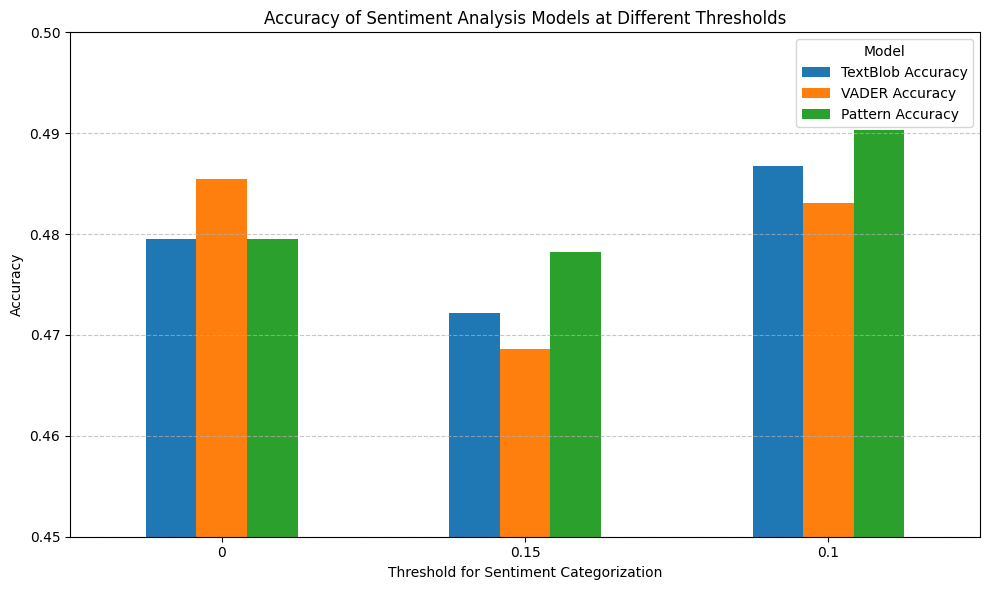

In [2]:
# neutral 값 변경에 따른 모델 성능
import pandas as pd
import matplotlib.pyplot as plt

data = {
    "Threshold": ["0", "0.15", "0.1"],
    "TextBlob Accuracy": [0.47946859903381644, 0.4722222222222222, 0.4867149758454106],
    "VADER Accuracy": [0.4855072463768116, 0.46859903381642515, 0.4830917874396135],
    "Pattern Accuracy": [0.47946859903381644, 0.4782608695652174, 0.49033816425120774]
}

df = pd.DataFrame(data)

# Plotting
ax = df.plot(x="Threshold", kind="bar", figsize=(10, 6), title="Accuracy of Sentiment Analysis Models at Different Thresholds")
ax.set_xlabel("Threshold for Sentiment Categorization")
ax.set_ylabel("Accuracy")
plt.ylim(0.45, 0.50)  # y축
plt.xticks(rotation=0)  # x축 라벨 회전
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # y축 격자
plt.legend(title="Model")
plt.tight_layout()
plt.show()

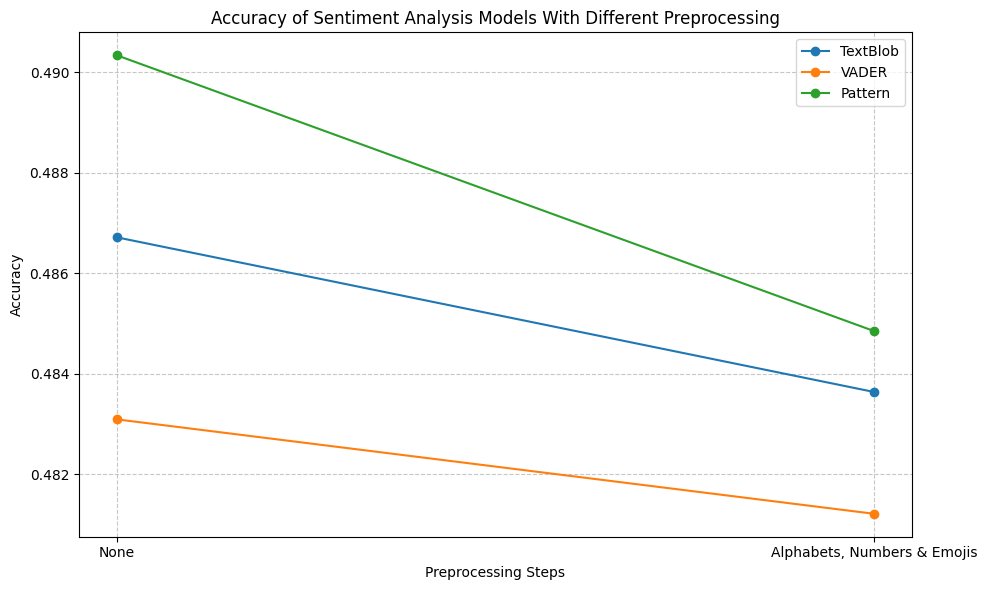

In [3]:
# 전처리 전/후 모델 성능 비교
data = {
    "Preprocessing": ["None", "Alphabets, Numbers & Emojis"],
    "TextBlob Accuracy": [0.4867149758454106, 0.48363636363636364],
    "VADER Accuracy": [0.4830917874396135, 0.4812121212121212],
    "Pattern Accuracy": [0.49033816425120774, 0.48484848484848486]
}

df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))
for column in df.columns[1:]:
    plt.plot(df["Preprocessing"], df[column], label=column.split()[0], marker='o')
plt.title("Accuracy of Sentiment Analysis Models With Different Preprocessing")
plt.xlabel("Preprocessing Steps")
plt.ylabel("Accuracy")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()